## Example application

For the purpose of demonstration, we show how you can use TEB to estimate the buildings' energy demand for cooling due to Air Conditioning (AC) using data and parameters to reproduce the CAPITOUL campaign. This tutorial is meant to guide you through a simple experiment with TEB for the demonstration purposes only. If you are looking to conduct a scientific experiment, please make sure that you understand the physical models first and make use of appropriate parameters.

In [1]:
import sys
from pathlib import Path
import f90nml
import matplotlib.pyplot as plt

In [2]:
THIS_DIR = Path.cwd()
PROJ_DIR = THIS_DIR.parents[1]
sys.path.append(str(PROJ_DIR / 'tools'))
from helpers import run_teb, load_txt, get_date_params
from common_names import standard_quantity_names, teb_quantity_names_output

First define the PATH to the teb executable you have intalled using the installation instructions in the main README.md.

In [3]:
path_to_teb_exe = PROJ_DIR / 'build' / 'driver'
path_to_case_dir = THIS_DIR

then run TEB with data from the `input` folder and current namelist (`input.nml`) using the `run_teb` helper function provided.

In [4]:
run_teb(THIS_DIR, path_to_teb_exe, None)

Running case: CAPITOUL


Now you can get the datetime information using the `get_date_params` function and load all the outputs with the `load_txt` functions provided.

In [5]:
case_nml = path_to_case_dir / 'input.nml'
start, freq = get_date_params(case_nml)
df_out = load_txt(path_to_case_dir / 'output', start, freq, tz='UTC')

## Plotting buildings' energy demand for cooling due to Air Conditioning (AC)

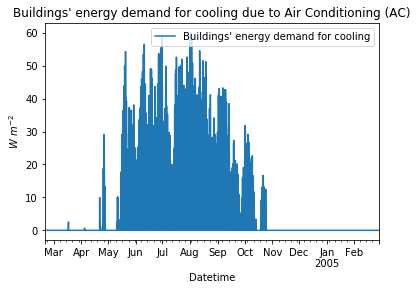

In [8]:
df= df_out[[teb_quantity_names_output['Buildings\' energy demand for cooling']]]
df.columns = ['Buildings\' energy demand for cooling']
df.plot()
ylabel = standard_quantity_names[df.columns[0]]['unit']
plt.ylabel(f'${ylabel}$')
plt.xlabel('Datetime')
plt.title('Buildings\' energy demand for cooling due to Air Conditioning (AC)')
plt.show()